In [1]:
import itk
import numpy as np
from PIL import Image

In [2]:
fixed_image = itk.imread('fingerprints/1_1.png', itk.F)
moving_image = itk.imread('fingerprints/1_3.png', itk.F)

In [3]:
parameter_object = itk.ParameterObject.New()

rigid = parameter_object.GetDefaultParameterMap("rigid")
rigid["Metric"] = ["AdvancedNormalizedCorrelation"]
parameter_object.AddParameterMap(rigid)

affine = parameter_object.GetDefaultParameterMap("affine")
affine["Metric"] = ["AdvancedNormalizedCorrelation"]
parameter_object.AddParameterMap(affine)

bspline = parameter_object.GetDefaultParameterMap("bspline")
bspline["FinalGridSpacingInPhysicalUnits"] = ["10.0"]
parameter_object.AddParameterMap(bspline)


In [4]:
result_image, result_transform_parameters = itk.elastix_registration_method(
      fixed_image, moving_image,
      parameter_object=parameter_object,
      log_to_console=False)

In [5]:
result_array = itk.GetArrayFromImage(result_image)
result_int = ((result_array - result_array.min()) / (result_array.max() - result_array.min()) * 255).astype(np.uint8)

result = Image.fromarray(result_int)
result.save("enrolled.png")

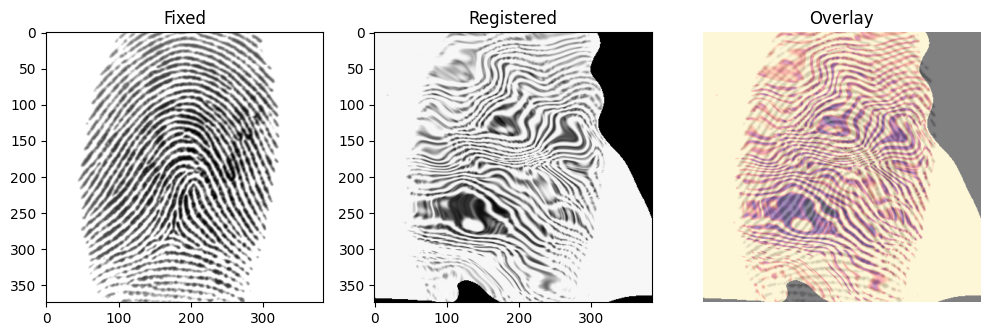

In [6]:
import matplotlib.pyplot as plt

fixed = itk.imread('fingerprints/1_1.png', itk.F)
fixed_np = itk.GetArrayViewFromImage(fixed)

registered = itk.imread('enrolled.png', itk.F)
registered_np = itk.GetArrayViewFromImage(registered)

plt.figure(figsize=(10,4))
plt.subplot(1,3,1); plt.title("Fixed");       plt.imshow(fixed_np, cmap='gray')
plt.subplot(1,3,2); plt.title("Registered");  plt.imshow(registered_np, cmap='gray')
plt.subplot(1,3,3); plt.title("Overlay");
plt.imshow(fixed_np, cmap='gray', alpha=0.5)
plt.imshow(registered_np, cmap='magma', alpha=0.5)
plt.axis('off')
plt.tight_layout(); plt.show()
